<b>Import dependenies</b>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import sigmoid, plot_decision_boundary, load_planar_dataset, load_extra_datasets

<b>Check dataset</b>

In [20]:
training_data, training_label = load_planar_dataset()

In [21]:
# view dataset

print(f'the training data:\n {training_data}')
print(f'the corresponding label:\n {training_label}')

the training data:
 [[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.513

In [22]:
# check dataset shape

print(f'the training data has shape: {training_data.shape}')
print(f'the training label has shape: {training_label.shape}')
print(f'total {training_data.shape[1]} items')

the training data has shape: (2, 400)
the training label has shape: (1, 400)
total 400 items


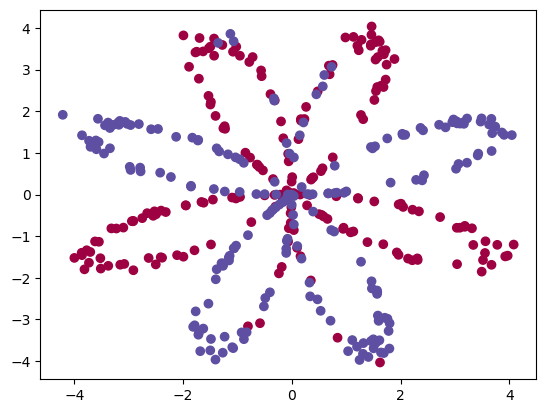

In [23]:
# visualize dataset

plt.scatter(training_data[0,:], training_data[1,:], c=training_label, cmap=plt.cm.Spectral)

<b>Import sklearn provide model</b>

In [24]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(training_data.T, training_label.T.ravel())

LogisticRegressionCV()

<b>Plot decision boundary</b>

Text(0.5, 1.0, 'logistic regression')

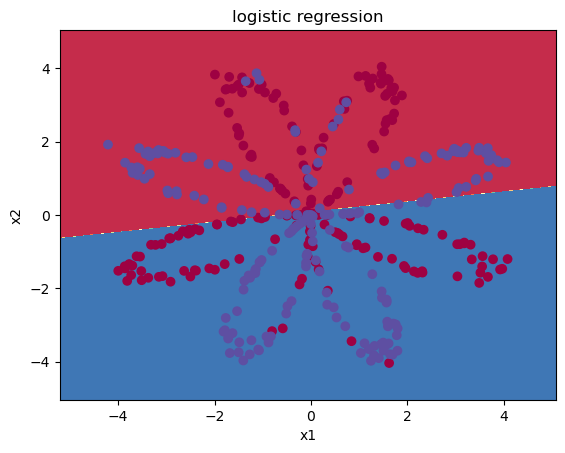

In [25]:
plot_decision_boundary(lambda x:clf.predict(x), training_data, training_label)
plt.title('logistic regression')

In [26]:
# accuracy
LR_predictions = clf.predict(training_data.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(training_label,LR_predictions) + np.dot(1-training_label,1-LR_predictions))/float(training_label.size)*100)+'%')

Accuracy of logistic regression: 47 %


<b>Neural Network</b>

<b>Initial layer size</b>

In [27]:
def init_layer_size(X, y):
    '''
    initialize layer size
    
    Args:
    X -- training dataset for determining input layer shape
    y -- corresponding label for determing output layer shape
    
    return:
    n_x -- input layer size
    n_h -- hidden layer size
    n_y -- output layer size 
    '''
    
    num_features, num_examples = X.shape
    num_labels, num_examples = y.shape
    
    n_x = num_features
    n_h = 4
    n_y = num_labels
    
    return n_x, n_h, n_y   

In [28]:
# test layer_size function

input_layer, hidden_layer, output_layer = init_layer_size(training_data, training_label)
print(f'{input_layer} input layers')
print(f'{hidden_layer} hidden_layers')
print(f'{output_layer} output_layers')

2 input layers
4 hidden_layers
1 output_layers


<b>Initial parameters</b>

In [29]:
def init_parameters(n_x, n_h, n_y):
    '''
    initialize model parameters
    
    Args:
    n_x -- size of input layer
    n_h -- size of hidden layer
    n_y -- size of output layer
    
    return:
    weights -- model weights
    bias -- model bias
    '''
    
    W1 = np.random.randn(n_x, n_h) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_h, n_y) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2,
    }
    
    return parameters

In [30]:
# test weights and bias

parameters = init_parameters(input_layer, hidden_layer, output_layer)
print(f'the hidden layer weights:\n {parameters["W1"]}')
print(f'the hidden layer bias:\n {parameters["b1"]}')
print(f'the output layer weights:\n {parameters["W2"]}')
print(f'the output layer bias:\n {parameters["b2"]}')

the hidden layer weights:
 [[ 0.00814343  0.0078047  -0.01464054 -0.00154491]
 [-0.00092432 -0.00237875 -0.00755663  0.01851438]]
the hidden layer bias:
 [[0.]
 [0.]
 [0.]
 [0.]]
the output layer weights:
 [[ 0.00209097]
 [ 0.01555016]
 [-0.00569149]
 [-0.01061797]]
the output layer bias:
 [[0.]]


<b>Activation function</b>

In [31]:
def sigmoid(z):
    '''
    sigmoid function
    
    Args:
    z -- input
    
    return:
    fx -- output
    '''
    
    fx = 1 / (1 + np.exp(-z))
    return fx    

In [32]:
# test sigmoid

z_test = np.random.randn(2,4)
print(f'z_test after sigmoid:\n {sigmoid(z_test)}')

z_test after sigmoid:
 [[0.53301384 0.3627989  0.91607279 0.56104959]
 [0.75998534 0.44417478 0.41919928 0.49227276]]


<b>Forward propagation</b>

In [33]:
def forward_propagation(X, parameters):
    '''
    forward propagation
    
    Args:
    X -- training set
    parameters -- weights and bias
    
    return:
    y_predict -- model prediction
    cache -- intermediate product for back propagation
    '''
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1.T, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = sigmoid(Z2)
    y_predict = A2
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return y_predict, cache

In [34]:
# one step forward pass

y_predict, cache = forward_propagation(training_data, parameters)
print(f'model prediction:\n {y_predict}')

model prediction:
 [[0.49989979 0.50008076 0.50006726 0.50012008 0.4999024  0.50029025
  0.49993566 0.50004325 0.49990908 0.49992273 0.49993307 0.50021533
  0.4999143  0.49992653 0.49993525 0.49998026 0.49989164 0.49994319
  0.49988542 0.49991966 0.49992446 0.49996981 0.49995575 0.4999358
  0.49997245 0.49987725 0.49991315 0.49989494 0.49991447 0.49997195
  0.49989764 0.49991688 0.49990267 0.49989325 0.4999158  0.49996922
  0.49990657 0.49999097 0.49995323 0.50000351 0.49998101 0.49993868
  0.49995359 0.49991417 0.5000018  0.49997607 0.50000328 0.49985694
  0.50000372 0.49996925 0.49998753 0.50000319 0.49998368 0.50000482
  0.49999773 0.49993192 0.49991671 0.49989342 0.49994453 0.49987661
  0.49999958 0.49983543 0.49989694 0.49995795 0.49988163 0.49993109
  0.49984357 0.49985696 0.49994316 0.49999606 0.49999799 0.49992902
  0.49986417 0.49985391 0.49983746 0.50000035 0.49985967 0.49987289
  0.49983895 0.49988236 0.49984057 0.49984003 0.49984731 0.49987416
  0.49985574 0.49985712 0.4998

<b>Loss function</b>

In [35]:
def loss(y_predict, y):
    '''
    calculate loss
    
    Args:
    y_predict -- model prediction
    y -- ground-truth label
    
    return:
    J -- cost
    '''
    
    m = y_predict.shape[1]
    J = -(1/m) * np.sum(y * np.log(y_predict) + (1-y) * np.log(1-y_predict))
    
    return J

In [36]:
# test loss function

cost = loss(y_predict, training_label)
print(f'model cost: {cost}')

model cost: 0.6931040276315803


<b>Backward propagation</b>

In [43]:
def back_propagation(X, y, parameters, cache):
    '''
    calculate gradients
    
    Args:
    X -- training_data
    cost -- cost 
    parameters -- weights and bias
    cache -- intermediate product
    
    return:
    grads -- gradients
    '''
    
    m = X.shape[1]
    
    dW1 = np.zeros(parameters['W1'].shape)
    dW2 = np.zeros(parameters['W2'].shape)
    db1 = np.zeros(parameters['b1'].shape)
    db2 = np.zeros(parameters['b2'].shape)
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1, dZ2.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2, dZ2) * (1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(X, dZ1.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        'dZ1': dZ1,
        'dZ2': dZ2,
        'dW1': dW1,
        'dW2': dW2,
        'db1': db1,
        'db2': db2
    }
    
    return grads

In [44]:
# test back_propagation

grads = back_propagation(training_data, training_label, parameters, cache)
print(f'dZ1:\n {grads["dZ1"]}')
print(f'dZ2:\n {grads["dZ2"]}')
print(f'dW1:\n {grads["dW1"]}')
print(f'dW2:\n {grads["dW2"]}')
print(f'db1:\n {grads["db1"]}')
print(f'db2:\n {grads["db2"]}')

dZ1:
 [[ 0.00104523  0.00104564  0.00104562 ... -0.00104563 -0.00104521
  -0.00104569]
 [ 0.00777352  0.00777616  0.00777601 ... -0.00777613 -0.00777275
  -0.00777668]
 [-0.00283951 -0.00284598 -0.00284593 ...  0.0028454   0.00284469
   0.00284307]
 [-0.005286   -0.00530577 -0.00530668 ...  0.00530439  0.00529935
   0.00529366]]
dZ2:
 [[ 0.49989979  0.50008076  0.50006726  0.50012008  0.4999024   0.50029025
   0.49993566  0.50004325  0.49990908  0.49992273  0.49993307  0.50021533
   0.4999143   0.49992653  0.49993525  0.49998026  0.49989164  0.49994319
   0.49988542  0.49991966  0.49992446  0.49996981  0.49995575  0.4999358
   0.49997245  0.49987725  0.49991315  0.49989494  0.49991447  0.49997195
   0.49989764  0.49991688  0.49990267  0.49989325  0.4999158   0.49996922
   0.49990657  0.49999097  0.49995323  0.50000351  0.49998101  0.49993868
   0.49995359  0.49991417  0.5000018   0.49997607  0.50000328  0.49985694
   0.50000372  0.49996925  0.49998753  0.50000319  0.49998368  0.5000048

<b>Update parameters</b>

In [41]:
def update_parameters(parameters, grads, learning_rate):
    '''
    update weigths and bias
    
    Args:
    parameters -- model parameters
    grads -- model gradients
    learning_rate -- learning rate alpha
    
    return:
    parameters -- updated parameters
    '''
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    updated_parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return updated_parameters

In [51]:
# test update parameters function

updated_parameters = update_parameters(parameters, grads, 0.1)
print(f'W1:\n {updated_parameters["W1"]}')
print(f'W2:\n {updated_parameters["W2"]}')
print(f'b1:\n {updated_parameters["b1"]}')
print(f'b2:\n {updated_parameters["b2"]}')

W1:
 [[ 0.0081481   0.00783947 -0.01465305 -0.0015687 ]
 [-0.00096549 -0.00268484 -0.0074446   0.01872196]]
W2:
 [[ 0.00212735]
 [ 0.01561441]
 [-0.0055753 ]
 [-0.01098497]]
b1:
 [[-7.33789074e-11]
 [-3.79948846e-09]
 [-4.92724551e-09]
 [ 2.34959923e-08]]
b2:
 [[5.87864423e-07]]


<b>Put all in one</b>

In [62]:
def nn_model(X, y, num_iterations = 2000, learning_rate = 0.1):
    '''
    put all above function in one
    
    Args:
    X -- training data
    y -- training label
    n_h -- number of hidden layers
    num_iterations -- number of iterations
    
    return:
    best_W -- best weights found by model
    best_b -- best bias found by model
    '''
    cost_history = []
    updated_parameters_history = []
    
    n_x, n_h, n_y = init_layer_size(X, y)
    parameters = init_parameters(n_x, n_h, n_y)
    for i in range(num_iterations):
        y_predict, cache = forward_propagation(X, parameters)
        cost = loss(y_predict, y)
        cost_history.append(cost)
        grads = back_propagation(X, y, parameters, cache)
        updated_parameters = update_parameters(parameters, grads, learning_rate)
        parameters = updated_parameters
        updated_parameters_history.append(updated_parameters)
        
        if i % 20 == 0:
            print(f'the model cost: {cost_history[i]} at {i+1} iteration')
    
    return updated_parameters_history

In [66]:
best_parameters = nn_model(training_data, training_label)[len(updated_parameters_history)-1]
print(f'best weights and bias found by model:\n {best_parameters}')

the model cost: 0.693110725266601 at 1 iteration
the model cost: 0.6930514244873143 at 21 iteration
the model cost: 0.6929316158600014 at 41 iteration
the model cost: 0.6926791572668194 at 61 iteration
the model cost: 0.6921558511726965 at 81 iteration
the model cost: 0.6911298840635425 at 101 iteration
the model cost: 0.6893277683531719 at 121 iteration
the model cost: 0.6866940635253866 at 141 iteration
the model cost: 0.6837039013255103 at 161 iteration
the model cost: 0.6811076241853214 at 181 iteration
the model cost: 0.6792655785827446 at 201 iteration
the model cost: 0.6780550860494461 at 221 iteration
the model cost: 0.6772321143733672 at 241 iteration
the model cost: 0.6766346227685321 at 261 iteration
the model cost: 0.6761777838095349 at 281 iteration
the model cost: 0.6758042923078088 at 301 iteration
the model cost: 0.6754576262616814 at 321 iteration
the model cost: 0.6750732359266068 at 341 iteration
the model cost: 0.6745721084478362 at 361 iteration
the model cost: 0.6

<b>predict</b>

In [67]:
def predict(parameters, X):
    '''
    using the parameters found by model to predict on the test data
    '''
    
    y_prediction, cache = forward_propagation(X, parameters)
    predictions = (y_prediction > 0.5)
    
    return predictions

In [71]:
test_data = np.random.randn(2, 100)
print(f'the model prediction:\n {predict(best_parameters, test_data)}')

the model prediction:
 [[False  True  True False  True False  True  True  True False False False
   True  True  True  True False  True False  True  True  True False  True
   True  True  True False  True  True  True False  True False False False
  False  True  True False False  True False  True False  True False False
  False False  True False False False False  True  True False False  True
  False False  True  True False False False  True  True False False False
   True  True  True False  True  True  True False  True False  True False
  False  True False False False False False  True False False  True  True
   True  True  True  True]]


<b>Plot decision boundary</b>

Text(0.5, 1.0, 'Decision boundary with random init parameters')

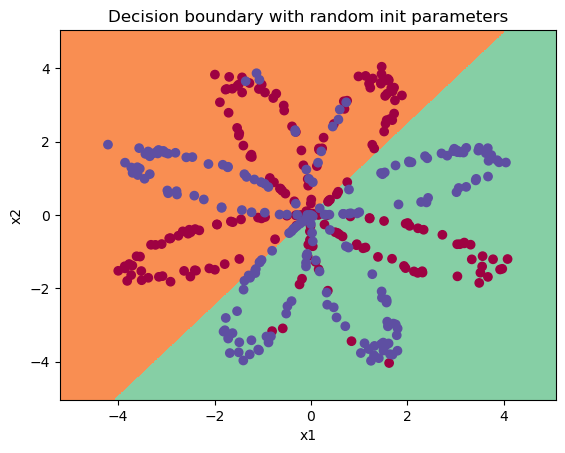

In [74]:
plot_decision_boundary(lambda x: predict(parameters, x.T), training_data, training_label)
plt.title('Decision boundary with random init parameters')

Text(0.5, 1.0, 'Decision boundary with best parameters found by model')

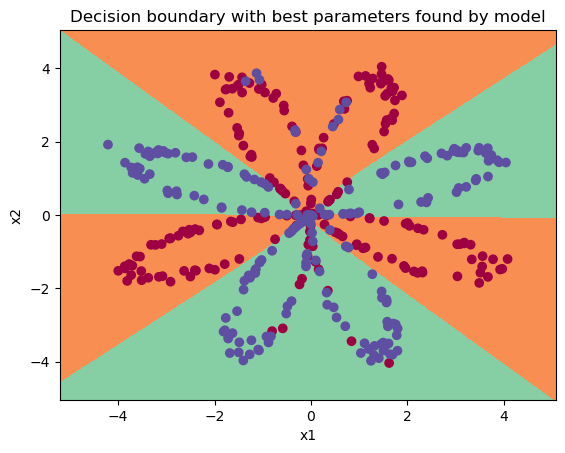

In [75]:
plot_decision_boundary(lambda x: predict(best_parameters, x.T), training_data, training_label)
plt.title('Decision boundary with best parameters found by model')

In [93]:
# print accurary

predictions = predict(best_parameters, training_data)
print(f'Accurary: {float((np.dot(training_label, predictions.T) + np.dot(1 - training_label, 1 - predictions.T)) / (training_label.size) * 100)}%')


Accurary: 87.0%


<b>Test on other dataset</b>

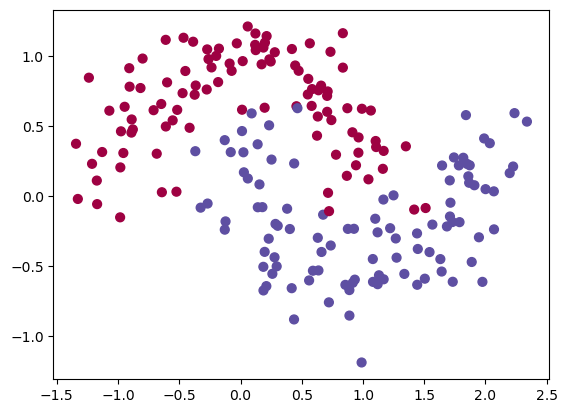

In [95]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);